## Predictive Model

In [172]:
from sklearn.tree import DecisionTreeClassifier
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import cross_val_score,cross_validate,train_test_split
from sklearn import metrics
from sklearn.metrics import recall_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [469]:
df=pd.read_csv('Cleaned_data.csv')

In [177]:
df['Status'].value_counts()

0    74
1    67
Name: Status, dtype: int64

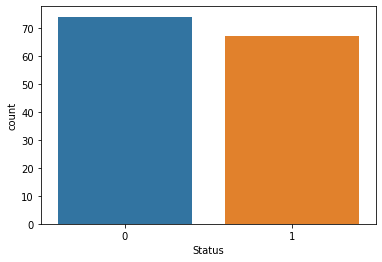

In [178]:
sns.countplot(x='Status',data=df)
plt.show()

In [179]:
df.groupby('Status').mean()

,Unnamed: 0,Ref,Age,Ug End Date 1,GRE Verbal1,GRE Verbal Percentile1,GRE Quantitative1,GRE Quantitative Percentile1,App - Financial - Amount Total,College Degree GPA
Status,,,,,,,,,,
0,77.135135,78.135135,27.756757,2011.459459,161.128571,85.932432,158.971429,71.621622,1141.891892,3.472973
1,62.119403,63.119403,27.552239,2011.373134,161.616071,86.761194,158.625000,69.940299,2238.805970,3.505672


## Logistic Regression

In [527]:
y=df.iloc[:,2]

### Use numerical value only

In [471]:
lst = ['Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA']
X=df[lst]
logreg = LogisticRegression(max_iter=100000) 
score = cross_val_score(logreg,X,y,cv=15,scoring='accuracy') 
print('Accuracy of logistic regression classifier on test set:',score.mean())

Accuracy of logistic regression classifier on test set: 0.477037037037037


### Encode ordinal categories

In [1130]:
df=pd.read_csv('Cleaned_data.csv')

In [1131]:
# Mapping
mapping1={'D':0,'C':1,'B':2,'A':3}
df['Reader 1 Academic']=df['Reader 1 Academic'].map(mapping1)
df['Reader 1 Leadership']=df['Reader 1 Leadership'].map(mapping1)
df['Reader 1 GPA']=df['Reader 1 GPA'].map(mapping1)
df['Reader 1 Recommendations']=df['Reader 1 Recommendations'].map(mapping1)
mapping2={'0-1 years': 0,'1-2 years': 1,'2-3 years': 2,'3-5 years': 3,'5-7 years': 4,'7+ years': 5}
df['Post-Bac Work']=df['Post-Bac Work'].map(mapping2)
df[['Post-Bac Work']].astype(int)

,Post-Bac Work
0,2
1,3
2,3
3,3
4,3
...,...
136,3
137,0
138,0
139,3


In [1132]:
df.dtypes

Unnamed: 0                          int64
Ref                                 int64
Status                              int64
Age                                 int64
Race                               object
Hispanic                           object
Masters Program                    object
Sex                                object
Ug End Date 1                       int64
Post-Bac Work                       int64
Reader 1 Academic                   int64
Reader 1 Leadership                 int64
Reader 1 GPA                        int64
Reader 1 Recommendations            int64
Area of Focus                      object
GRE Verbal1                       float64
GRE Verbal Percentile1              int64
GRE Quantitative1                 float64
GRE Quantitative Percentile1        int64
Region                             object
App - Financial - Amount Total      int64
College Degree GPA                float64
dtype: object

In [1133]:
lst = ['Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA','Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 GPA',
       'Reader 1 Recommendations','Post-Bac Work']
X=df[lst]
logreg = LogisticRegression(max_iter=100000) 
score = cross_val_score(logreg,X,y,cv=15,scoring='accuracy') 
print('Accuracy of logistic regression classifier on test set:',score.mean())

Accuracy of logistic regression classifier on test set: 0.534074074074074


Confusion matrix, without normalization
[[6 3]
 [3 3]]
Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.5        0.5       ]]


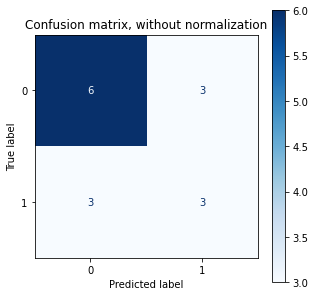

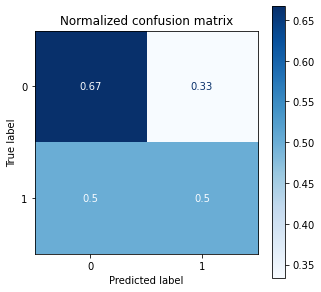

In [1137]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.1, random_state=0)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=LogisticRegression(max_iter=100000).fit(X_train,y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

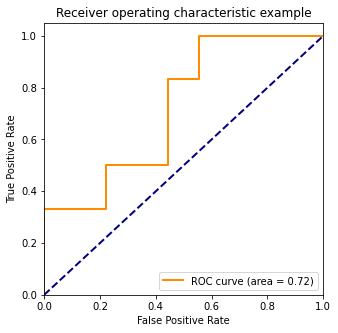

In [1138]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_score = classifier.fit(X_train, y_train).decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### One-hot encode categorical variable

In [1215]:
df=pd.read_csv('Cleaned_data.csv')

In [1216]:
# Mapping ordinal variables first
mapping1={'D':0,'C':1,'B':2,'A':3}
df['Reader 1 Academic']=df['Reader 1 Academic'].map(mapping1)
df['Reader 1 Leadership']=df['Reader 1 Leadership'].map(mapping1)
df['Reader 1 GPA']=df['Reader 1 GPA'].map(mapping1)
df['Reader 1 Recommendations']=df['Reader 1 Recommendations'].map(mapping1)
mapping2={'0-1 years': 0,'1-2 years': 1,'2-3 years': 2,'3-5 years': 3,'5-7 years': 4,'7+ years': 5}
df['Post-Bac Work']=df['Post-Bac Work'].map(mapping2)
df[['Post-Bac Work']].astype(int)

,Post-Bac Work
0,2
1,3
2,3
3,3
4,3
...,...
136,3
137,0
138,0
139,3


In [581]:
# One-hot encoding (without Region and Area of Focus)
X_cont = ['Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 GPA','Reader 1 Recommendations','Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 
          'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA', 'Post-Bac Work']
X_cat = ['Race', 'Masters Program','Hispanic','Sex']

cont_df = df[X_cont]
cat_df = df[X_cat]

# Creating dummy variable dataframe from categorical variables.
X = cont_df.join(pd.get_dummies(cat_df))

In [582]:
logreg = LogisticRegression(max_iter=100000) 
score = cross_val_score(logreg,X,y,cv=20,scoring='accuracy') 
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=15,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.58125
f1 score of logistic regression classifier on test set: 0.5293795093795094


Confusion matrix, without normalization
[[56 18]
 [30 37]]
Normalized confusion matrix
[[0.75675676 0.24324324]
 [0.44776119 0.55223881]]


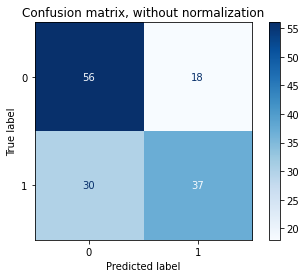

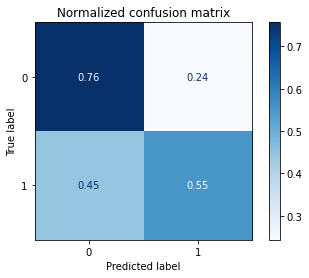

In [400]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=LogisticRegression(max_iter=100000).fit(X,y)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

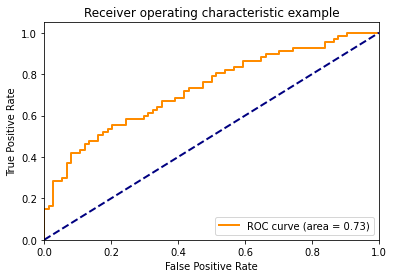

In [401]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_score = classifier.fit(X, y).decision_function(X)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y), y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [1363]:
# Include Region and Area of Focus
X_cont = ['Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 GPA','Reader 1 Recommendations','Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 
          'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA', 'Post-Bac Work']
X_cat = ['Race', 'Masters Program','Hispanic','Sex','Region','Area of Focus']

cont_df = df[X_cont]
cat_df = df[X_cat]

# Creating dummy variable dataframe from categorical variables.
X = cont_df.join(pd.get_dummies(cat_df))

In [1140]:
logreg = LogisticRegression(max_iter=100000) 
score = cross_val_score(logreg,X,y,cv=20,scoring='accuracy') 
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=15,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.5892857142857143
f1 score of logistic regression classifier on test set: 0.5201058201058201


Confusion matrix, without normalization
[[ 9  3]
 [ 7 10]]
Normalized confusion matrix
[[0.75       0.25      ]
 [0.41176471 0.58823529]]


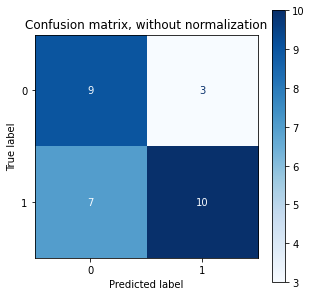

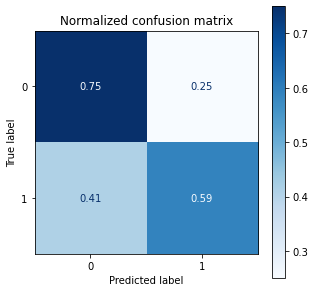

In [1164]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=LogisticRegression(max_iter=100000).fit(X_train,y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

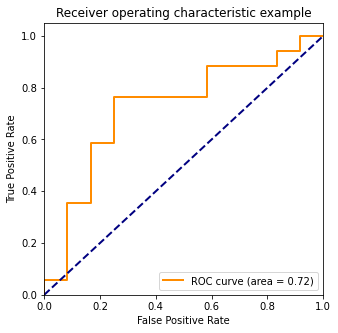

In [1165]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_score = classifier.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [633]:
for i in np.linspace(0.1,1,10):
    for j in range(4,30):
        logreg = LogisticRegression(penalty='l2',max_iter=100000,C=i,class_weight='balanced',solver='liblinear') 
        score = cross_val_score(logreg,X,y,cv=j,scoring='accuracy') 
        print('Factor for regularization:',i,'fold size',j)
        print('Accuracy of logistic regression classifier on test set:',score.mean())
        f1 = cross_val_score(logreg,X,y,cv=15,scoring='f1') 
        print('f1 score of logistic regression classifier on test set:',f1.mean())

Factor for regularization: 0.1 fold size 4
Accuracy of logistic regression classifier on test set: 0.5956349206349206
f1 score of logistic regression classifier on test set: 0.4734728234728235
Factor for regularization: 0.1 fold size 5
Accuracy of logistic regression classifier on test set: 0.5598522167487685
f1 score of logistic regression classifier on test set: 0.4734728234728235
Factor for regularization: 0.1 fold size 6
Accuracy of logistic regression classifier on test set: 0.567330917874396
f1 score of logistic regression classifier on test set: 0.4734728234728235
Factor for regularization: 0.1 fold size 7
Accuracy of logistic regression classifier on test set: 0.5952380952380951
f1 score of logistic regression classifier on test set: 0.4734728234728235
Factor for regularization: 0.1 fold size 8
Accuracy of logistic regression classifier on test set: 0.5751633986928104
f1 score of logistic regression classifier on test set: 0.4734728234728235
Factor for regularization: 0.1 fold 

Factor for regularization: 0.2 fold size 21
Accuracy of logistic regression classifier on test set: 0.5850340136054422
f1 score of logistic regression classifier on test set: 0.5232948532948533
Factor for regularization: 0.2 fold size 22
Accuracy of logistic regression classifier on test set: 0.6060606060606061
f1 score of logistic regression classifier on test set: 0.5232948532948533
Factor for regularization: 0.2 fold size 23
Accuracy of logistic regression classifier on test set: 0.6035196687370601
f1 score of logistic regression classifier on test set: 0.5232948532948533
Factor for regularization: 0.2 fold size 24
Accuracy of logistic regression classifier on test set: 0.5611111111111111
f1 score of logistic regression classifier on test set: 0.5232948532948533
Factor for regularization: 0.2 fold size 25
Accuracy of logistic regression classifier on test set: 0.5546666666666666
f1 score of logistic regression classifier on test set: 0.5232948532948533
Factor for regularization: 0.2

Factor for regularization: 0.4 fold size 10
Accuracy of logistic regression classifier on test set: 0.5590476190476191
f1 score of logistic regression classifier on test set: 0.5256084656084656
Factor for regularization: 0.4 fold size 11
Accuracy of logistic regression classifier on test set: 0.6031468531468532
f1 score of logistic regression classifier on test set: 0.5256084656084656
Factor for regularization: 0.4 fold size 12
Accuracy of logistic regression classifier on test set: 0.5612373737373737
f1 score of logistic regression classifier on test set: 0.5256084656084656
Factor for regularization: 0.4 fold size 13
Accuracy of logistic regression classifier on test set: 0.5678321678321677
f1 score of logistic regression classifier on test set: 0.5256084656084656
Factor for regularization: 0.4 fold size 14
Accuracy of logistic regression classifier on test set: 0.5883116883116883
f1 score of logistic regression classifier on test set: 0.5256084656084656
Factor for regularization: 0.4

f1 score of logistic regression classifier on test set: 0.5256084656084655
Factor for regularization: 0.5 fold size 27
Accuracy of logistic regression classifier on test set: 0.5518518518518518
f1 score of logistic regression classifier on test set: 0.5256084656084655
Factor for regularization: 0.5 fold size 28
Accuracy of logistic regression classifier on test set: 0.5535714285714285
f1 score of logistic regression classifier on test set: 0.5256084656084655
Factor for regularization: 0.5 fold size 29
Accuracy of logistic regression classifier on test set: 0.5827586206896551
f1 score of logistic regression classifier on test set: 0.5256084656084655
Factor for regularization: 0.6 fold size 4
Accuracy of logistic regression classifier on test set: 0.5954365079365079
f1 score of logistic regression classifier on test set: 0.5241269841269841
Factor for regularization: 0.6 fold size 5
Accuracy of logistic regression classifier on test set: 0.5736453201970444
f1 score of logistic regression 

Factor for regularization: 0.7000000000000001 fold size 17
Accuracy of logistic regression classifier on test set: 0.56781045751634
f1 score of logistic regression classifier on test set: 0.5374603174603174
Factor for regularization: 0.7000000000000001 fold size 18
Accuracy of logistic regression classifier on test set: 0.574404761904762
f1 score of logistic regression classifier on test set: 0.5374603174603174
Factor for regularization: 0.7000000000000001 fold size 19
Accuracy of logistic regression classifier on test set: 0.5949248120300753
f1 score of logistic regression classifier on test set: 0.5374603174603174
Factor for regularization: 0.7000000000000001 fold size 20
Accuracy of logistic regression classifier on test set: 0.575
f1 score of logistic regression classifier on test set: 0.5374603174603174
Factor for regularization: 0.7000000000000001 fold size 21
Accuracy of logistic regression classifier on test set: 0.5691609977324263
f1 score of logistic regression classifier on 

f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 0.9 fold size 8
Accuracy of logistic regression classifier on test set: 0.6094771241830066
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 0.9 fold size 9
Accuracy of logistic regression classifier on test set: 0.5680555555555555
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 0.9 fold size 10
Accuracy of logistic regression classifier on test set: 0.5519047619047619
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 0.9 fold size 11
Accuracy of logistic regression classifier on test set: 0.6171328671328671
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 0.9 fold size 12
Accuracy of logistic regression classifier on test set: 0.5896464646464646
f1 score of logistic regression 

Factor for regularization: 1.0 fold size 24
Accuracy of logistic regression classifier on test set: 0.5819444444444445
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 1.0 fold size 25
Accuracy of logistic regression classifier on test set: 0.584
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 1.0 fold size 26
Accuracy of logistic regression classifier on test set: 0.5589743589743589
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 1.0 fold size 27
Accuracy of logistic regression classifier on test set: 0.5518518518518518
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 1.0 fold size 28
Accuracy of logistic regression classifier on test set: 0.5678571428571428
f1 score of logistic regression classifier on test set: 0.5467195767195767
Factor for regularization: 1.0 fold size 29

In [1166]:
logreg = LogisticRegression(penalty='l2',max_iter=100000,C=1,class_weight='balanced',solver='liblinear') 
score = cross_val_score(logreg,X,y,cv=14,scoring='accuracy') 
print('Factor for regularization: 1','fold size: 14')
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=14,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Factor for regularization: 1 fold size: 14
Accuracy of logistic regression classifier on test set: 0.6240259740259739
f1 score of logistic regression classifier on test set: 0.5909090909090908


Confusion matrix, without normalization
[[ 9  3]
 [ 7 10]]
Normalized confusion matrix
[[0.75       0.25      ]
 [0.41176471 0.58823529]]


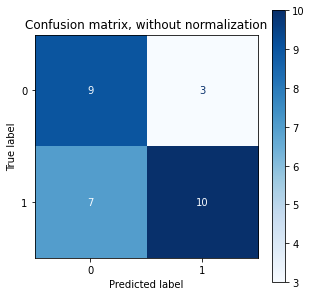

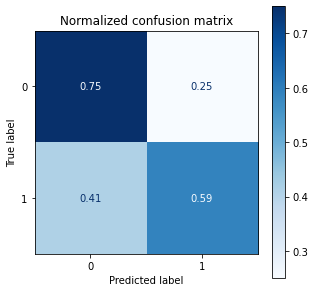

In [1173]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=2)
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=logreg.fit(X_train,y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

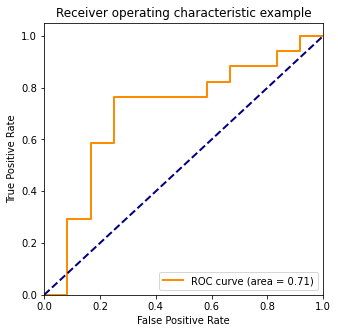

In [1174]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_score = classifier.decision_function(X_test)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Use label encoder for categorical variables

In [1312]:
# Mapping ordinal variables first
mapping1={'D':0,'C':1,'B':2,'A':3}
df=pd.read_csv('Cleaned_data.csv')
df['Reader 1 Academic']=df['Reader 1 Academic'].map(mapping1)
df['Reader 1 Leadership']=df['Reader 1 Leadership'].map(mapping1)
df['Reader 1 GPA']=df['Reader 1 GPA'].map(mapping1)
df['Reader 1 Recommendations']=df['Reader 1 Recommendations'].map(mapping1)
mapping2={'0-1 years': 0,'1-2 years': 1,'2-3 years': 2,'3-5 years': 3,'5-7 years': 4,'7+ years': 5}
df['Post-Bac Work']=df['Post-Bac Work'].map(mapping2)

In [1313]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y=df.iloc[:,2]
X=df[['Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 GPA','Reader 1 Recommendations','Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 
          'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA', 'Post-Bac Work','Race', 'Masters Program', 'Area of Focus', 'Region','Hispanic','Sex']]

In [1314]:
mappings = []
for i, col in enumerate(X):
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(np.array(X[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

/Users/yangfan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [1315]:
logreg = LogisticRegression(max_iter=100000) 
score = cross_val_score(logreg,X,y,cv=15,scoring='accuracy') 
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=15,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.5274074074074073
f1 score of logistic regression classifier on test set: 0.4439356939356939


Confusion matrix, without normalization
[[54 20]
 [31 36]]
Normalized confusion matrix
[[0.72972973 0.27027027]
 [0.46268657 0.53731343]]


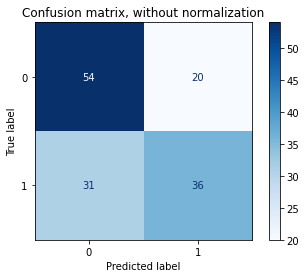

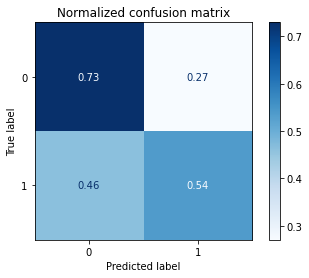

In [1034]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=LogisticRegression(max_iter=100000).fit(X,y)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

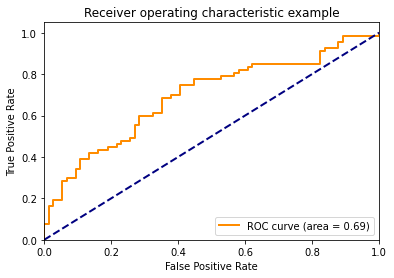

In [1037]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
y_score = classifier.fit(X, y).decision_function(X)
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y), y_score)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [805]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x=scaler.fit_transform(X)
logreg.fit(x,y)
logreg.coef_

array([[-0.59393132, -0.15743681,  0.14383319,  0.29007928, -0.4554279 ,
        -0.4285592 ,  0.15731068, -0.28981273,  0.28976587,  0.16398666,
        -0.1051042 ,  0.0300198 , -0.07162722, -0.04450027, -0.26180295,
         0.1608856 ,  0.02626274]])

## Decison Tree

In [1317]:
from sklearn import tree
scores=[]
for i in range(3,20):
    clf = tree.DecisionTreeClassifier(max_depth=i)
    print('Max_depth',i,'Score',cross_val_score(clf, X, y, cv=20,scoring='accuracy').mean())
    scores.append(cross_val_score(clf, X, y, cv=20,scoring='accuracy').mean())

Max_depth 3 Score 0.475
Max_depth 4 Score 0.4678571428571428
Max_depth 5 Score 0.45357142857142857
Max_depth 6 Score 0.46875
Max_depth 7 Score 0.5044642857142857
Max_depth 8 Score 0.5544642857142856
Max_depth 9 Score 0.5741071428571429
Max_depth 10 Score 0.5616071428571429
Max_depth 11 Score 0.5276785714285716
Max_depth 12 Score 0.49642857142857133
Max_depth 13 Score 0.5178571428571427
Max_depth 14 Score 0.5044642857142857
Max_depth 15 Score 0.5249999999999999
Max_depth 16 Score 0.5205357142857142
Max_depth 17 Score 0.5473214285714285
Max_depth 18 Score 0.5205357142857143
Max_depth 19 Score 0.5107142857142857


In [1318]:
clf = tree.DecisionTreeClassifier(max_depth=8)
score=cross_val_score(clf, X, y, cv=20)
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=20,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.58125
f1 score of logistic regression classifier on test set: 0.4304365079365079


Confusion matrix, without normalization
[[74  0]
 [23 44]]
Normalized confusion matrix
[[1.         0.        ]
 [0.34328358 0.65671642]]


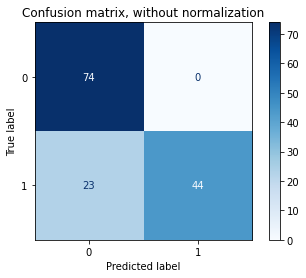

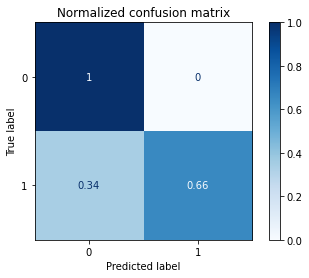

In [1058]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
classifier=clf.fit(X,y)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(classifier, X, y,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

## Tunning the tree

In [1321]:
from sklearn import tree
scores=[]
for j in range(2,5):
    for i in range(3,20):
        clf = tree.DecisionTreeClassifier(max_depth=i,class_weight='balanced',min_samples_split=j)
        print('Max_depth',i,'Min_split',j,'Score',cross_val_score(clf, X, y, cv=20,scoring='accuracy').mean())
        scores.append([i,j,cross_val_score(clf, X, y, cv=20,scoring='accuracy').mean()])

Max_depth 3 Min_split 2 Score 0.4678571428571428
Max_depth 4 Min_split 2 Score 0.4821428571428571
Max_depth 5 Min_split 2 Score 0.44732142857142854
Max_depth 6 Min_split 2 Score 0.49017857142857146
Max_depth 7 Min_split 2 Score 0.5044642857142857
Max_depth 8 Min_split 2 Score 0.5678571428571428
Max_depth 9 Min_split 2 Score 0.5392857142857143
Max_depth 10 Min_split 2 Score 0.5169642857142857
Max_depth 11 Min_split 2 Score 0.5098214285714286
Max_depth 12 Min_split 2 Score 0.4892857142857143
Max_depth 13 Min_split 2 Score 0.4401785714285714
Max_depth 14 Min_split 2 Score 0.4758928571428571
Max_depth 15 Min_split 2 Score 0.48303571428571423
Max_depth 16 Min_split 2 Score 0.46875
Max_depth 17 Min_split 2 Score 0.4687499999999999
Max_depth 18 Min_split 2 Score 0.49017857142857146
Max_depth 19 Min_split 2 Score 0.45446428571428565
Max_depth 3 Min_split 3 Score 0.45357142857142857
Max_depth 4 Min_split 3 Score 0.475
Max_depth 5 Min_split 3 Score 0.4330357142857143
Max_depth 6 Min_split 3 Scor

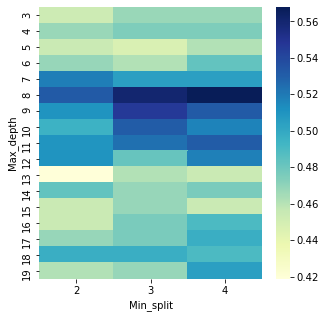

In [1322]:
temp=pd.DataFrame(scores)
temp.columns=['Max_depth','Min_split','Accuracy']
ax = sns.heatmap(temp.pivot('Max_depth','Min_split','Accuracy'),cmap="YlGnBu")

In [1331]:
clf = tree.DecisionTreeClassifier(max_depth=8,min_samples_split=4,class_weight='balanced')
score=cross_val_score(clf, X, y, cv=20)
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=20,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.5607142857142857
f1 score of logistic regression classifier on test set: 0.4304365079365079


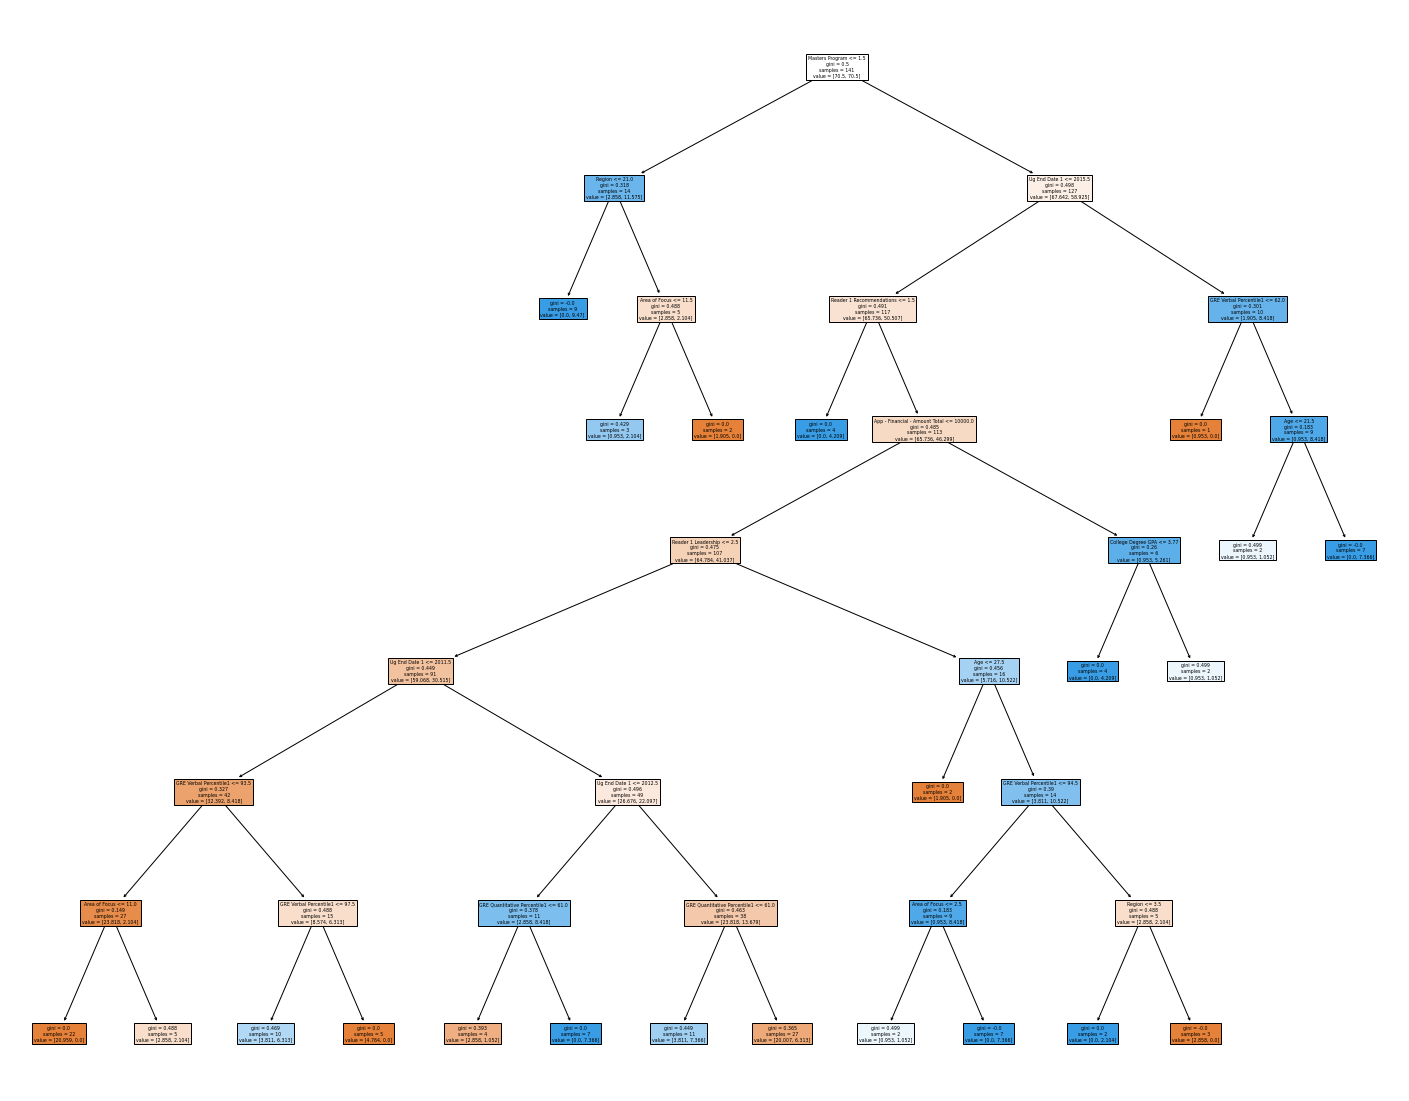

In [1341]:
clf = tree.DecisionTreeClassifier(max_depth=8,class_weight='balanced',min_samples_split=4)
clf.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

## Prunning

In [886]:
# Tree with categorical variable is more robust, we will do pruning based on this decision tree

In [1333]:
from sklearn import tree
scores=[]
for i in range(3,30):
    for j in [0,0.0001,0.0002,0.0005,0.0008,0.001,0.002,0.005,0.008,0.01,0.015,0.02]:
        clf = tree.DecisionTreeClassifier(max_depth=i,class_weight='balanced',ccp_alpha=j)
        scores.append([i,j,cross_val_score(clf, X, y, cv=20,scoring='accuracy').mean()])

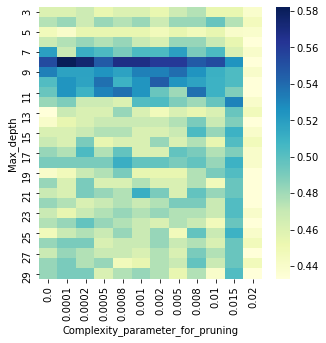

In [1334]:
temp=pd.DataFrame(scores)
temp.columns=['Max_depth','Complexity_parameter_for_pruning','Accuracy']
ax = sns.heatmap(temp.pivot('Max_depth','Complexity_parameter_for_pruning','Accuracy'),cmap="YlGnBu")

In [1343]:
clf = tree.DecisionTreeClassifier(max_depth=8,ccp_alpha=0.0001,class_weight='balanced')
score=cross_val_score(clf, X, y, cv=20)
print('Accuracy of logistic regression classifier on test set:',score.mean())
f1 = cross_val_score(logreg,X,y,cv=20,scoring='f1') 
print('f1 score of logistic regression classifier on test set:',f1.mean())

Accuracy of logistic regression classifier on test set: 0.5535714285714286
f1 score of logistic regression classifier on test set: 0.4304365079365079


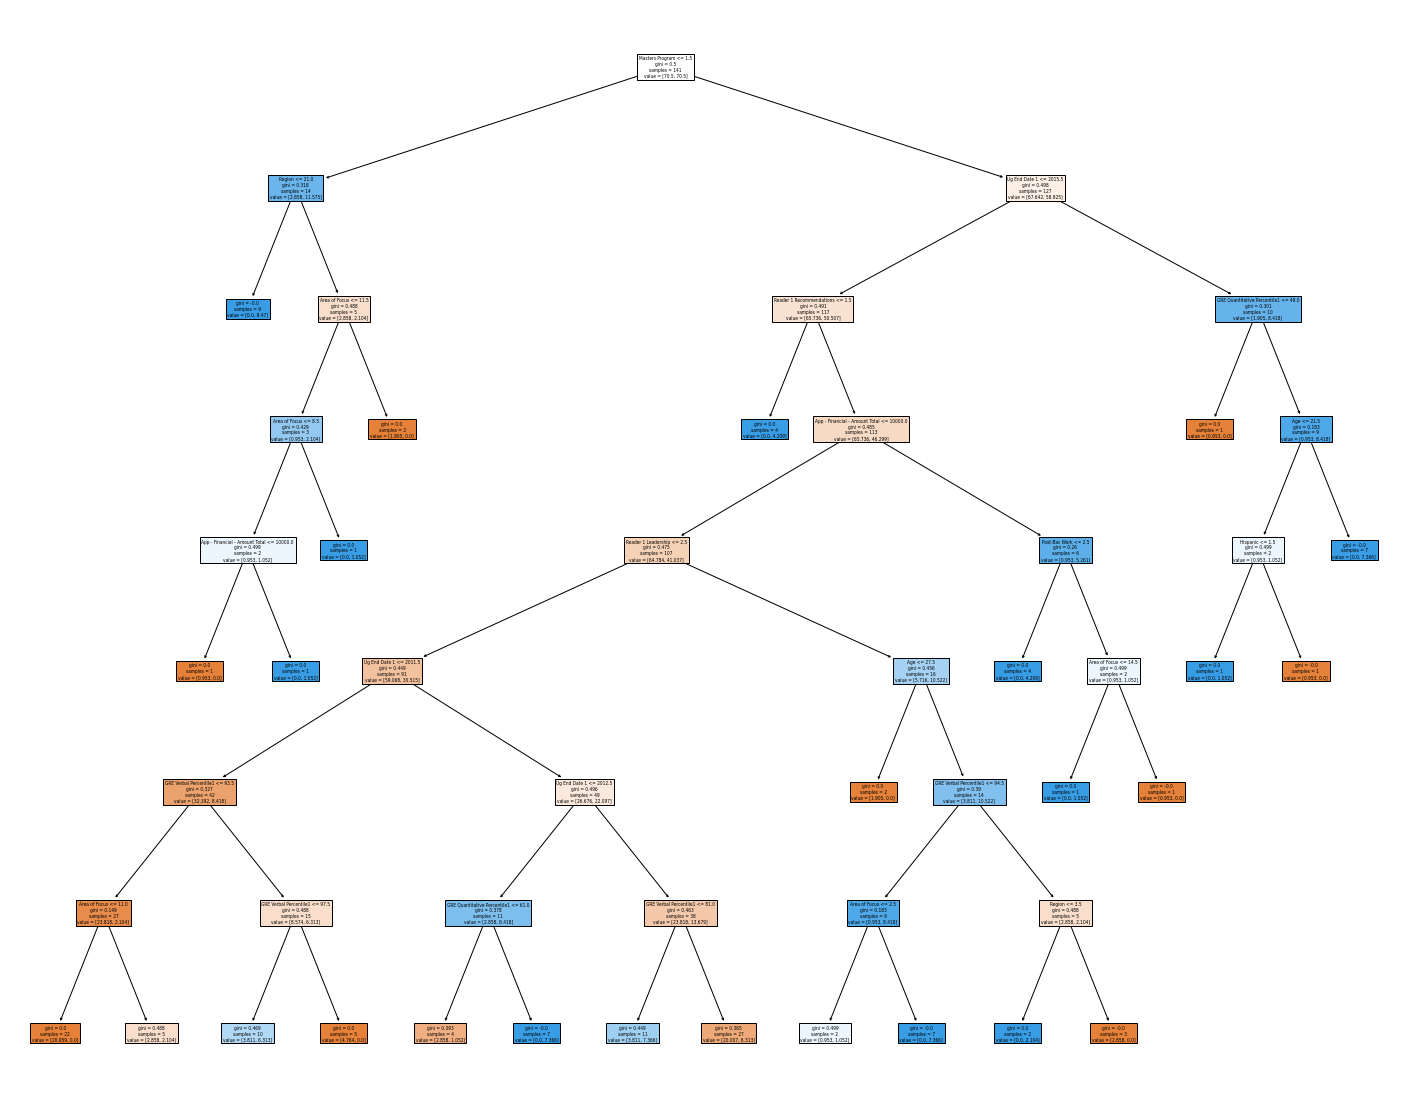

In [1342]:
clf = tree.DecisionTreeClassifier(max_depth=8,class_weight='balanced',ccp_alpha=0.0001)
clf.fit(X,y)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=X.columns,
                   filled=True)

## Random Forest

In [1373]:
from sklearn.preprocessing import LabelEncoder
df=pd.read_csv('Cleaned_data.csv')
mapping1={'D':0,'C':1,'B':2,'A':3}
df['Reader 1 Academic']=df['Reader 1 Academic'].map(mapping1)
df['Reader 1 Leadership']=df['Reader 1 Leadership'].map(mapping1)
df['Reader 1 GPA']=df['Reader 1 GPA'].map(mapping1)
df['Reader 1 Recommendations']=df['Reader 1 Recommendations'].map(mapping1)
mapping2={'0-1 years': 0,'1-2 years': 1,'2-3 years': 2,'3-5 years': 3,'5-7 years': 4,'7+ years': 5}
df['Post-Bac Work']=df['Post-Bac Work'].map(mapping2)
label_encoder = LabelEncoder()
y=df.iloc[:,2]
X=df[['Reader 1 Academic', 'Reader 1 Leadership', 'Reader 1 GPA','Reader 1 Recommendations','Age', 'Ug End Date 1', 'GRE Verbal Percentile1', 
          'GRE Quantitative Percentile1', 'App - Financial - Amount Total', 'College Degree GPA', 'Post-Bac Work','Race', 'Masters Program', 'Area of Focus', 'Region','Hispanic','Sex']]
mappings = []
for i, col in enumerate(X):
    if X[col].dtype == 'object':
        X[col] = label_encoder.fit_transform(np.array(X[col].astype(str)).reshape((-1,)))
        mappings.append(dict(zip(label_encoder.classes_, range(1, len(label_encoder.classes_)+1))))

/Users/yangfan/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


### Base model

In [1374]:
X

,Reader 1 Academic,Reader 1 Leadership,Reader 1 GPA,Reader 1 Recommendations,Age,Ug End Date 1,GRE Verbal Percentile1,GRE Quantitative Percentile1,App - Financial - Amount Total,College Degree GPA,Post-Bac Work,Race,Masters Program,Area of Focus,Region,Hispanic,Sex
0,2,1,2,2,28,2012,92,76,0,3.49,2,5,3,9,22,1,1
1,1,2,2,2,28,2011,97,79,0,3.59,3,5,3,3,9,1,1
2,2,3,3,3,29,2010,68,76,0,3.79,3,2,3,7,9,1,1
3,3,3,1,2,28,2011,85,82,0,3.32,3,4,3,15,14,1,0
4,2,1,2,2,31,2009,99,97,0,3.51,3,5,4,3,4,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
136,2,3,2,3,29,2011,95,85,0,3.55,3,5,3,15,5,1,0
137,2,2,2,2,26,2014,95,59,0,3.87,0,5,3,0,9,1,0
138,2,1,1,2,22,2015,94,94,0,3.49,0,2,4,14,10,1,0
139,1,2,2,2,28,2011,82,79,0,3.59,3,5,4,10,13,1,1


In [1380]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
clf.fit(X, y)
accuracy=cross_val_score(clf, X, y, cv=20).mean()

In [1381]:
accuracy

0.48303571428571423

In [974]:
# Tunning

In [992]:
mx=[0,0,0,0]
for i in range(2,10):
    for j in range(2,6):
            for l in range(7,14):
                clf = RandomForestClassifier(n_estimators=500,max_depth=i,min_samples_split=j, random_state=0,class_weight='balanced',max_samples=10*l)
                clf.fit(X, y)
                accuracy=cross_val_score(clf, X, y, cv=20).mean()
                if accuracy>mx[-1]:
                    mx=[i,j,k,l,accuracy]
                print('Accuracy of logistic regression classifier on test set:',accuracy,'Max depth',i,'Min split',j,'ccp',k,'Max sample',10*l)

Accuracy of logistic regression classifier on test set: 0.5044642857142857 Max depth 2 Min split 2 ccp 0.0003 Max sample 70
Accuracy of logistic regression classifier on test set: 0.5107142857142857 Max depth 2 Min split 2 ccp 0.0003 Max sample 80
Accuracy of logistic regression classifier on test set: 0.5464285714285714 Max depth 2 Min split 2 ccp 0.0003 Max sample 90
Accuracy of logistic regression classifier on test set: 0.5249999999999999 Max depth 2 Min split 2 ccp 0.0003 Max sample 100
Accuracy of logistic regression classifier on test set: 0.5178571428571428 Max depth 2 Min split 2 ccp 0.0003 Max sample 110
Accuracy of logistic regression classifier on test set: 0.532142857142857 Max depth 2 Min split 2 ccp 0.0003 Max sample 120
Accuracy of logistic regression classifier on test set: 0.5464285714285714 Max depth 2 Min split 2 ccp 0.0003 Max sample 130
Accuracy of logistic regression classifier on test set: 0.5044642857142857 Max depth 2 Min split 3 ccp 0.0003 Max sample 70
Accur

Accuracy of logistic regression classifier on test set: 0.5116071428571428 Max depth 4 Min split 3 ccp 0.0003 Max sample 100
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 4 Min split 3 ccp 0.0003 Max sample 110
Accuracy of logistic regression classifier on test set: 0.4678571428571428 Max depth 4 Min split 3 ccp 0.0003 Max sample 120
Accuracy of logistic regression classifier on test set: 0.4821428571428571 Max depth 4 Min split 3 ccp 0.0003 Max sample 130
Accuracy of logistic regression classifier on test set: 0.49017857142857146 Max depth 4 Min split 4 ccp 0.0003 Max sample 70
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 4 Min split 4 ccp 0.0003 Max sample 80
Accuracy of logistic regression classifier on test set: 0.49017857142857135 Max depth 4 Min split 4 ccp 0.0003 Max sample 90
Accuracy of logistic regression classifier on test set: 0.5107142857142857 Max depth 4 Min split 4 ccp 0.0003 Max sample 100
A

Accuracy of logistic regression classifier on test set: 0.49017857142857135 Max depth 6 Min split 4 ccp 0.0003 Max sample 130
Accuracy of logistic regression classifier on test set: 0.4973214285714286 Max depth 6 Min split 5 ccp 0.0003 Max sample 70
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 6 Min split 5 ccp 0.0003 Max sample 80
Accuracy of logistic regression classifier on test set: 0.5044642857142857 Max depth 6 Min split 5 ccp 0.0003 Max sample 90
Accuracy of logistic regression classifier on test set: 0.4687499999999999 Max depth 6 Min split 5 ccp 0.0003 Max sample 100
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 6 Min split 5 ccp 0.0003 Max sample 110
Accuracy of logistic regression classifier on test set: 0.48303571428571423 Max depth 6 Min split 5 ccp 0.0003 Max sample 120
Accuracy of logistic regression classifier on test set: 0.49017857142857146 Max depth 6 Min split 5 ccp 0.0003 Max sample 130


Accuracy of logistic regression classifier on test set: 0.4973214285714286 Max depth 9 Min split 2 ccp 0.0003 Max sample 90
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 9 Min split 2 ccp 0.0003 Max sample 100
Accuracy of logistic regression classifier on test set: 0.4687499999999999 Max depth 9 Min split 2 ccp 0.0003 Max sample 110
Accuracy of logistic regression classifier on test set: 0.4687499999999999 Max depth 9 Min split 2 ccp 0.0003 Max sample 120
Accuracy of logistic regression classifier on test set: 0.4758928571428571 Max depth 9 Min split 2 ccp 0.0003 Max sample 130
Accuracy of logistic regression classifier on test set: 0.4973214285714286 Max depth 9 Min split 3 ccp 0.0003 Max sample 70
Accuracy of logistic regression classifier on test set: 0.48303571428571423 Max depth 9 Min split 3 ccp 0.0003 Max sample 80
Accuracy of logistic regression classifier on test set: 0.48303571428571423 Max depth 9 Min split 3 ccp 0.0003 Max sample 90
Ac

In [993]:
mx

[2, 2, 0.0003, 9, 0.5464285714285714]

In [1005]:
for i in range(5,20):
    clf = RandomForestClassifier(n_estimators=10*i,max_depth=2,min_samples_split=2, random_state=0,class_weight='balanced',max_samples=90)
    clf.fit(X, y)
    accuracy=cross_val_score(clf, X, y, cv=20).mean()
    print('Accuracy of logistic regression classifier on test set:',accuracy)

Accuracy of logistic regression classifier on test set: 0.5321428571428571
Accuracy of logistic regression classifier on test set: 0.5964285714285714
Accuracy of logistic regression classifier on test set: 0.575
Accuracy of logistic regression classifier on test set: 0.5544642857142856
Accuracy of logistic regression classifier on test set: 0.5392857142857143
Accuracy of logistic regression classifier on test set: 0.5678571428571428
Accuracy of logistic regression classifier on test set: 0.5544642857142856
Accuracy of logistic regression classifier on test set: 0.5678571428571428
Accuracy of logistic regression classifier on test set: 0.5544642857142857
Accuracy of logistic regression classifier on test set: 0.5464285714285715
Accuracy of logistic regression classifier on test set: 0.5544642857142857
Accuracy of logistic regression classifier on test set: 0.5544642857142856
Accuracy of logistic regression classifier on test set: 0.5607142857142857
Accuracy of logistic regression classi

In [1595]:
clf = RandomForestClassifier(n_estimators=60,max_depth=2,min_samples_split=2,class_weight='balanced')

In [1642]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)
clf.fit(X_train,y_train)
y_test, y_pred = y_test, clf.predict(X_test)
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred)) 
y_train_proba = clf.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_proba))
y_proba = clf.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_proba))

Accuracy : 0.6
AUC Score (Train): 0.692191
AUC Score (Test): 0.666667


Confusion matrix, without normalization
[[4 2]
 [4 5]]
Normalized confusion matrix
[[0.66666667 0.33333333]
 [0.44444444 0.55555556]]


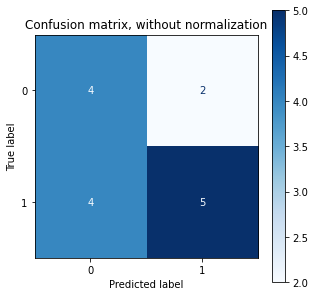

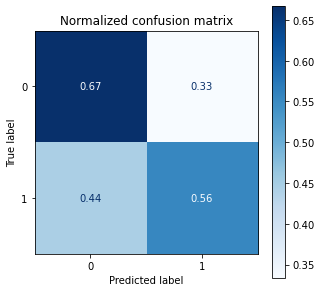

In [1643]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]

for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

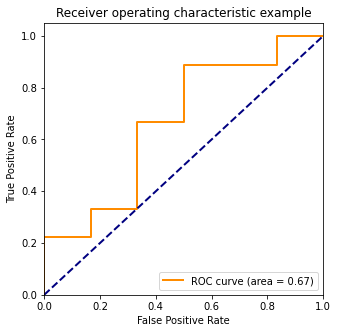

In [1644]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_pred)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Naive Bayes

In [1669]:
from sklearn.naive_bayes import GaussianNB
clf = GaussianNB()
x=X.drop(['Age'],axis=1)
accuracy=cross_val_score(clf, x, y, cv=20).mean()

In [1670]:
accuracy

0.6321428571428572

Confusion matrix, without normalization
[[8 2]
 [2 3]]
Normalized confusion matrix
[[0.8 0.2]
 [0.4 0.6]]


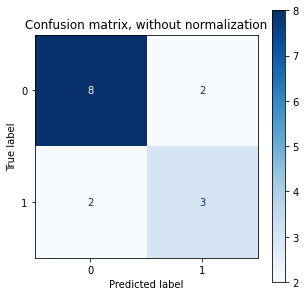

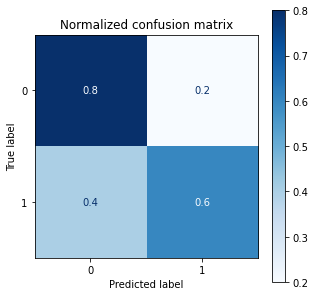

In [1695]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.1)
clf.fit(X_train,y_train)
for title, normalize in titles_options:
    disp = plot_confusion_matrix(clf, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

In [1696]:
clf.fit(X_train,y_train)
y_train_proba = clf.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_proba))
y_proba = clf.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_proba))

AUC Score (Train): 0.699345
AUC Score (Test): 0.760000


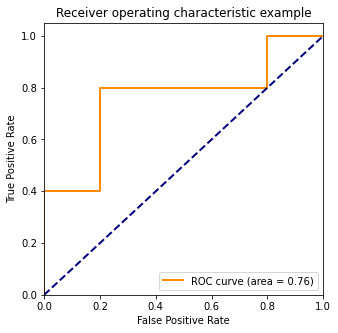

In [1697]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_pred)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

### Xgboost

In [1634]:
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.metrics import accuracy_score
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn import metrics
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=3)
model = XGBClassifier(learning_rate=0.01,
                      n_estimators=3,          
                      max_depth=4,               
                      min_child_weight =2,     
                      gamma=0,                  
                      subsample=1,               
                      colsample_btree=1,         
                      scale_pos_weight=1,                  
                      slient = 0,
                      objective='binary:logistic'
                      )
model.fit(X_train,y_train)

[02:40:30] WARNING: /Users/travis/build/dmlc/xgboost/src/learner.cc:516: 
Parameters: { colsample_btree, slient } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBClassifier(base_score=0.5, booster='gbtree', colsample_btree=1,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              gamma=0, gpu_id=-1, importance_type='gain',
              interaction_constraints='', learning_rate=0.01, max_delta_step=0,
              max_depth=4, min_child_weight=2, missing=nan,
              monotone_constraints='()', n_estimators=3, n_jobs=0,
              num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
              scale_pos_weight=1, slient=0, subsample=1, tree_method='exact',
              validate_parameters=1, verbosity=None)

In [1638]:
y_test, y_pred = y_test, model.predict(X_test)
print("Accuracy : %.4g" % metrics.accuracy_score(y_test, y_pred)) 
y_train_proba = model.predict_proba(X_train)[:,1]
print("AUC Score (Train): %f" % metrics.roc_auc_score(y_train, y_train_proba))
y_proba = model.predict_proba(X_test)[:,1]
print("AUC Score (Test): %f" % metrics.roc_auc_score(y_test, y_proba))

Accuracy : 0.6667
AUC Score (Train): 0.778409
AUC Score (Test): 0.723214


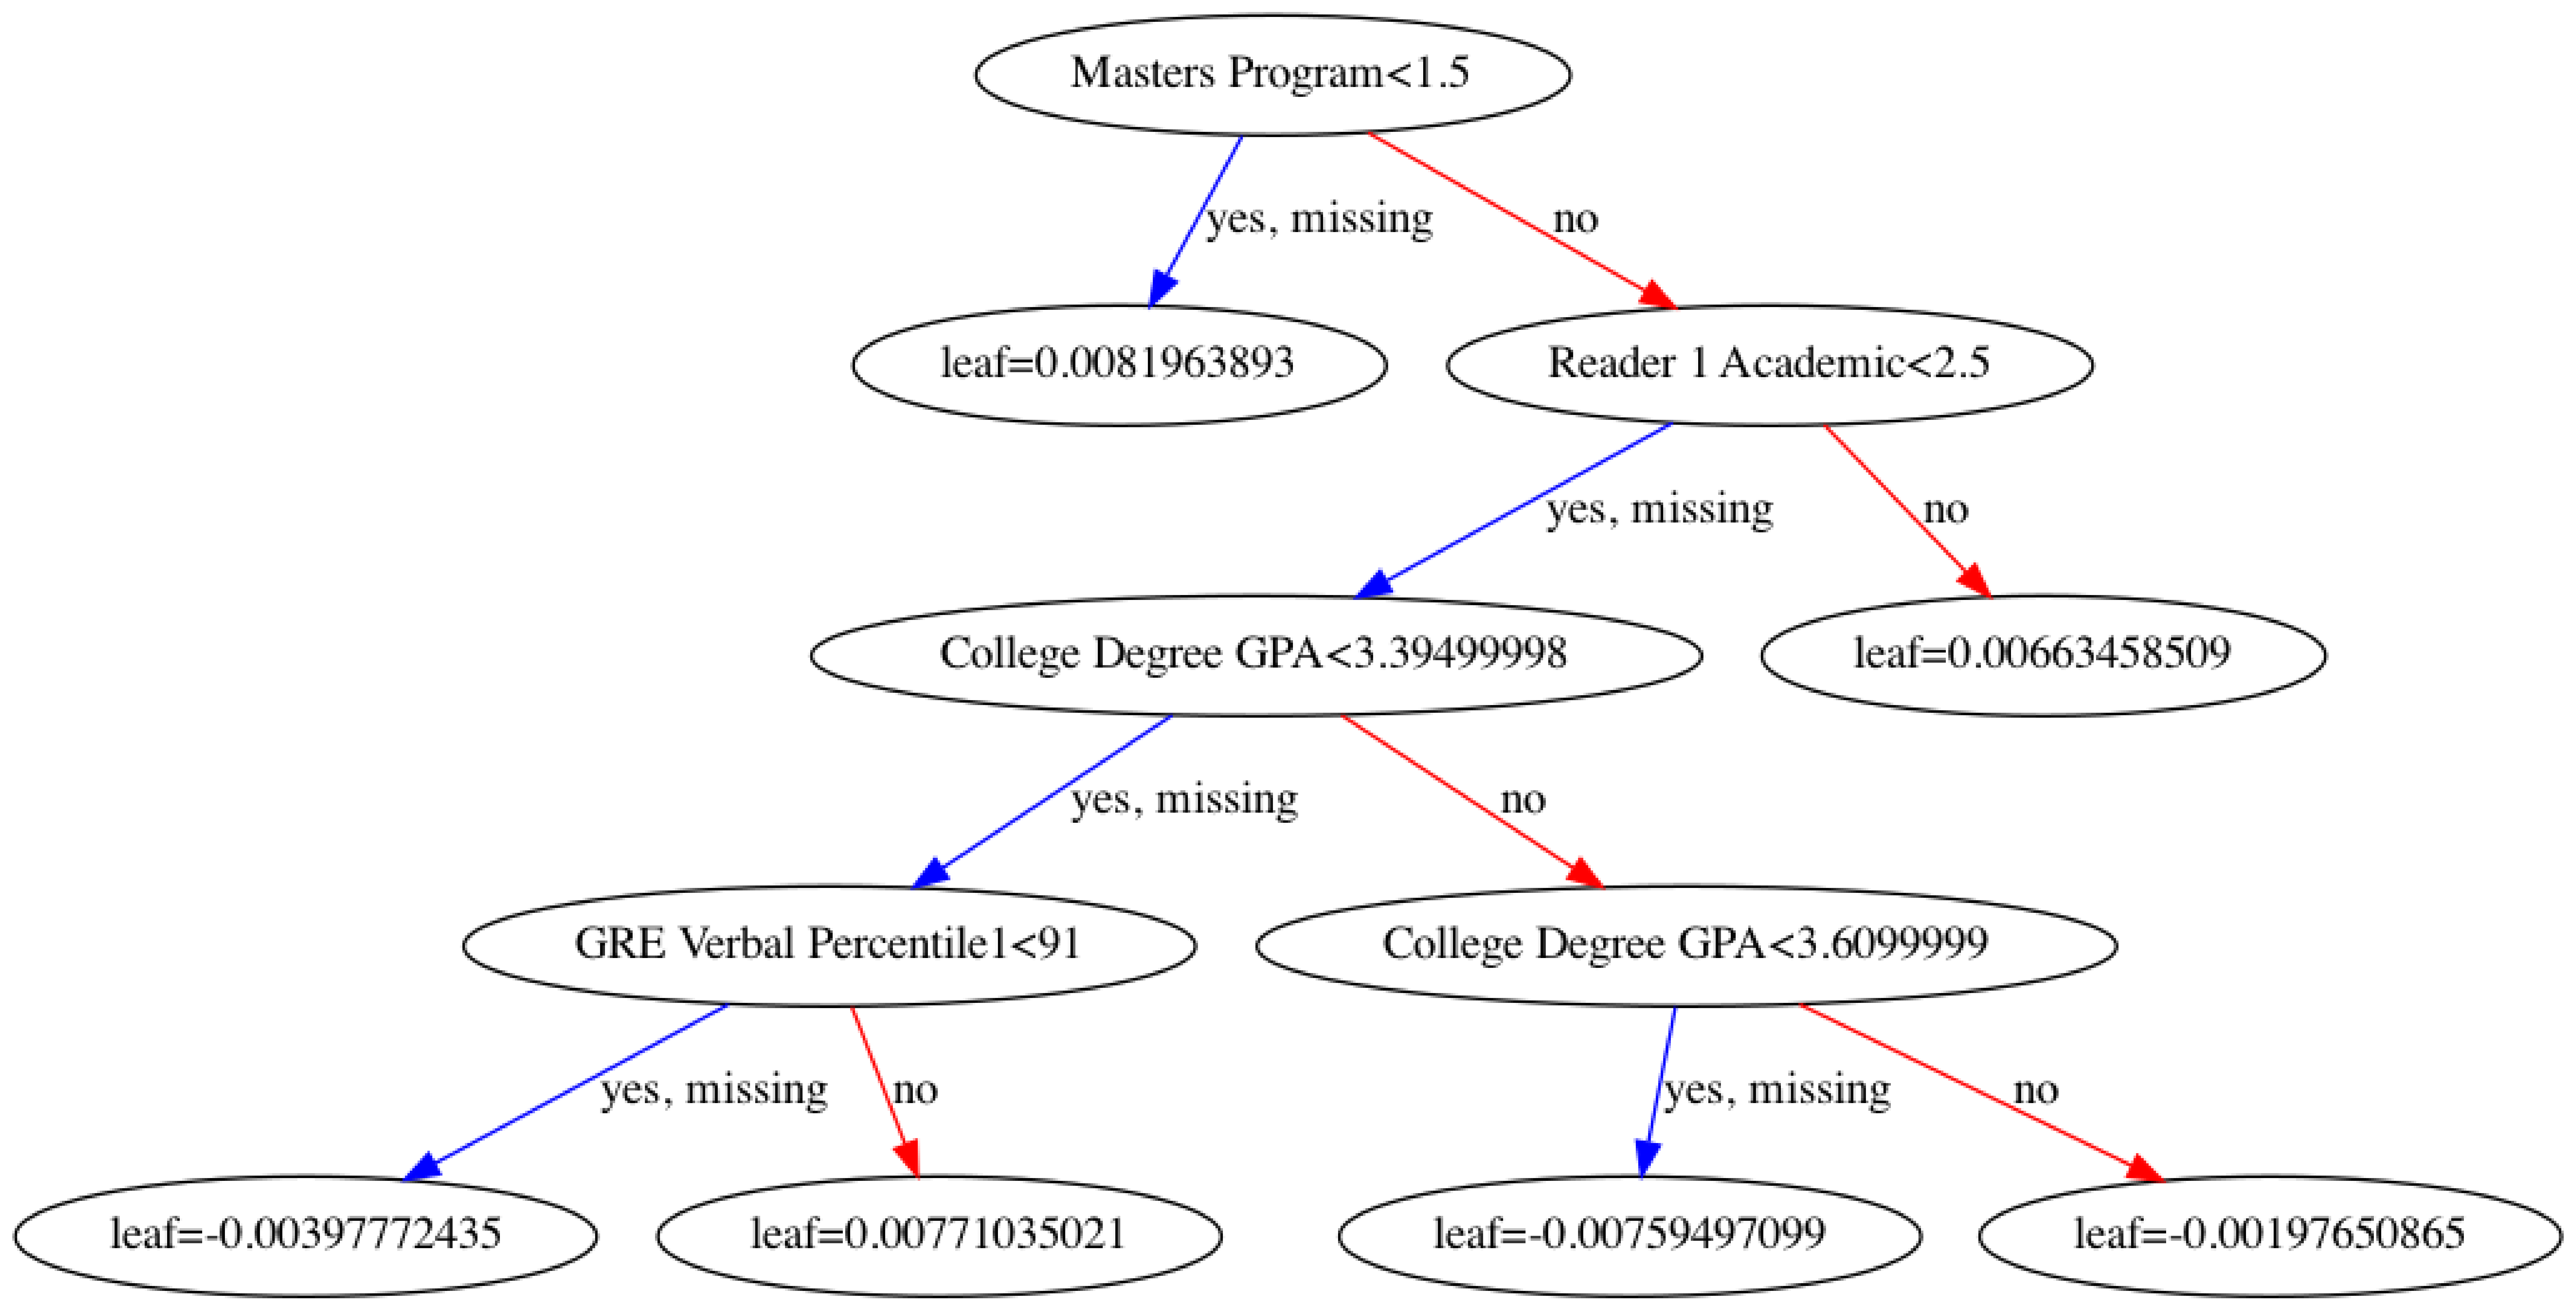

In [1550]:
from xgboost import plot_tree
plot_tree(model,num_trees=1)
fig = plt.gcf()
fig.set_size_inches(150, 100)


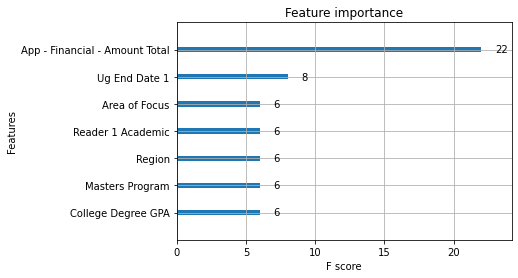

In [1129]:
xgb.plot_importance(model)
plt.rcParams['figure.figsize'] = [5, 5]
plt.show()

Confusion matrix, without normalization
[[6 2]
 [3 4]]
Normalized confusion matrix
[[0.75       0.25      ]
 [0.42857143 0.57142857]]


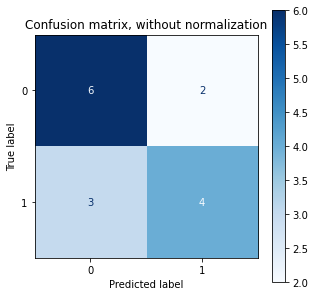

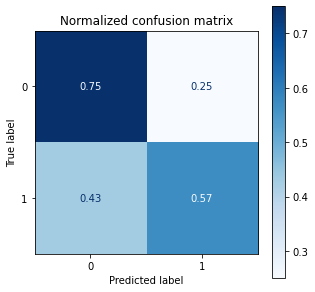

In [1593]:
#Confusion Matrix
from sklearn.metrics import plot_confusion_matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
y_test, y_pred = y_test, model.predict(X_test) 

for title, normalize in titles_options:
    disp = plot_confusion_matrix(model, X_test, y_test,
                                 cmap=plt.cm.Blues,
                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

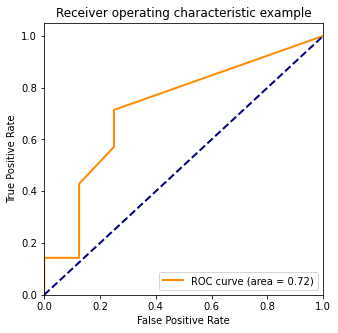

In [1559]:
#ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
fpr = dict()
tpr = dict()
roc_auc = dict()
fpr[0], tpr[0], _ = roc_curve(np.array(y_test), y_pred)
roc_auc[0] = auc(fpr[0], tpr[0])

# Compute micro-average ROC curve and ROC area
fpr["micro"], tpr["micro"], _ = roc_curve(y_test.ravel(), y_proba.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])
plt.figure()
lw = 2
plt.plot(fpr['micro'], tpr['micro'], color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc['micro'])
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()